# Projeto de analise de casos de diabetes

In [9]:
import sklearn as sl
sl.__version__

'0.21.3'

### Informações sobre os atributos:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

# Extraido e carregando meus dados

In [12]:
# Carregando arquivo csv usando NumPy
import numpy as np
arquivo = 'pima-data.csv'
arquivo_data = open(arquivo,'rb')
dados = np.loadtxt(arquivo_data, delimiter = ",")
print(dados.shape)

(768, 9)


In [18]:
# Carregando arquivo csv usando Pandas
import pandas as pd
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = pd.read_csv(arquivo, names = colunas)
print(dados.shape)

(768, 9)


In [17]:
# Carregando arquivo csv usando Pandas
#uso dessa forma pra não usar muita meoria do pc que ja não é boa. 
from pandas import read_csv
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
print(dados.shape)

(768, 9)


# Analise exploratoria 

### Usando estatistica descritiva

In [19]:
dados.head(20)

preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118    84    47   230  45.8  0.551   31      1
17     7   107    74     0     0  29.6  0.254   31      1
18     1   103    30    38    83  43.3  0.183   33      0
19     1   115    70    30    96  34.6  0.529   32      1

In [20]:
dados.shape

(768, 9)

O tipo dos dados é muito importante. Pode ser necessário converter strings ou colunas com números inteiros podem representar variáveis categóricas ou valores ordinários.

In [21]:
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [22]:
#fazer aq um sumario estatistico
dados.describe()

preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [23]:
#v erifico como minhas classes estão distribuidas coluna que recebe 0 ou 1.
# a classe esta desbalanceada 
# obs: pode dar problema, o eu do futuro verifica isso depois. 
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

Dei um google é achei isso, vai me servi de documentção. 

A correlação é o relacionamento entre 2 variáveis. O métodos mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

In [24]:
# correlação pearson
dados.corr(method = 'pearson' )

preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

In [27]:
#basicamente vou retornar um valor de quão proximo aquela coluna esta de uma distribuição normal
# obs é bom eu lembrar que alguns ou maioria dos algoritimos  de machine esperam receber dados que tenham distribuição normal 
# vou ter que lembrar de indentificar se os dados estão com distribuição normal. 
dados.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

## vizualização com matplotlib

In [28]:
import matplotlib.pyplot as plt

Vou utilizar alguns graficos pra facilitar a vizulaização dos dados, para vizulaizar o relacionamento entre variaveis.
vai facilitar minha analise

Com o histograma podemos rapidamente avaliar a distribuição de cada atributo. Os histograma agrupam os dados em bins e fornecem uma contagem do número de observações em cada bin. Com o histograma, você pode rapidamente verificar a simetria dos dados e se eles estão em distribuição normal ou não. Isso também vai ajudar na identificação dos outliers.

Podemos ver que os atributos age, pedi e test possuem uma distribuição exponencial. Podemos ver que as colunas mass e press possuem uma distribuição normal.

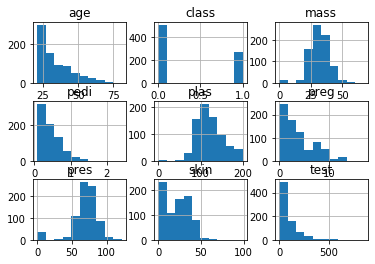

In [31]:
# Histograma univariado
dados.hist()
plt.show()

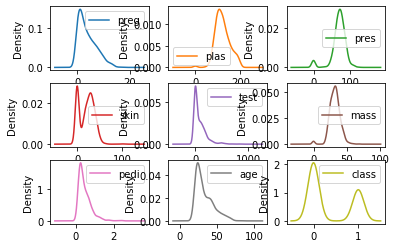

In [34]:
## density Plot Univariado
# Density Plots são outra forma de visualizar a distribuição dos dados para cada atributo. 
# O plot é como uma espécie de histograma abstrato com uma curva suave através do topo dos bins de um histograma. 
# Pode ser mais fácil identificar a distribuição dos dados usando um density plot.
dados.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

Com os boxplots também podemos revisar a distribuição dos dados para cada atributo. A linha no centro (vermelho) é o valor da mediana (quartil 50%), a linha abaixo é o quartil 25% e a linha acima o quartil 75%. O boxplot ajuda a ter uma ideia da dispersão dos dados e os possíveis outliers.

Podemos ver que a dispersão dos dados é bem diferente entre os atributos. As colunas age, skin e test possuem uma simetria muito próxima a valores de dados menores.

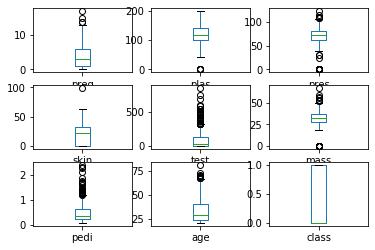

In [35]:
# Box and Whisker Plots
dados.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

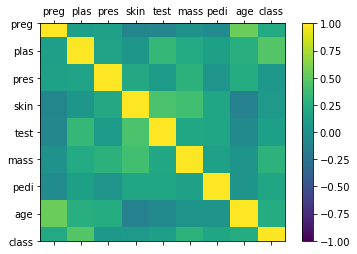

In [36]:
# Matriz de Correlação com nomes das variáveis
correlations = dados.corr()

# Plot
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

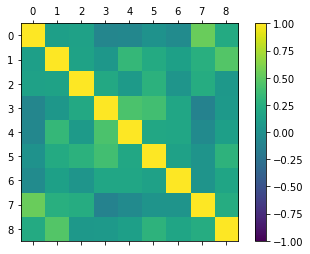

In [37]:
# Matriz de Correlação genérica removendo o nome das variaveis 
correlations = dados.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()